# Graficas de palabras

In [1]:
# Librerias requeridas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Lectura de datos
name_words_cero=pd.read_excel('data/name_words_cero.xlsx')
name_words_not_cero=pd.read_excel('data/name_words_not_cero.xlsx')
name_words_goal=pd.read_excel('data/name_words_goal.xlsx')

short_description_words_cero=pd.read_excel('data/short_description_words_cero.xlsx')
short_description_words_not_cero=pd.read_excel('data/short_description_words_not_cero.xlsx')
short_description_words_goal=pd.read_excel('data/short_description_words_goal.xlsx')

long_description_words_cero=pd.read_excel('data/long_description_words_cero.xlsx')
long_description_words_not_cero=pd.read_excel('data/long_description_words_not_cero.xlsx')
long_description_words_goal=pd.read_excel('data/long_description_words_goal.xlsx')


In [3]:
# hpgraph es una función transforma una lista en una tupla con dos listas para 
# poder crear gráfias
def hpgraph(serie, total_rows):
    serie=serie[:10]
    x=[]
    y=[]
    
    for s in serie:        
        x.append(s[0])
        y.append(float(s[1])/float(total_rows))    
    return (x,y)

In [4]:
name_words_cero_to_graph=hpgraph(name_words_cero.values.tolist(), len(name_words_cero.values.tolist()))
name_words_not_cero_to_graph=hpgraph(name_words_not_cero.values.tolist(), len(name_words_not_cero.values.tolist()))
name_words_goal_to_graph=hpgraph(name_words_goal.values.tolist(), len(name_words_goal.values.tolist()))

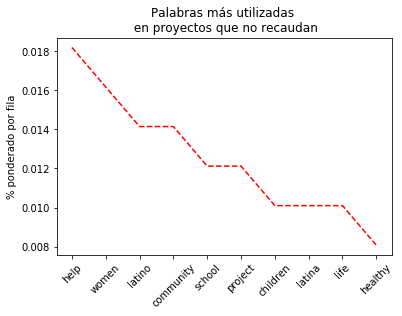

In [5]:
plt.plot(name_words_cero_to_graph[0], name_words_cero_to_graph[1], 'r--')
xTicks=name_words_cero_to_graph[0]
plt.title(u'Palabras más utilizadas \n en proyectos que no recaudan')
plt.ylabel(u'% ponderado por fila')
plt.xticks(name_words_cero_to_graph[0], xTicks)
plt.xticks(range(10), xTicks, rotation=45) #writes strings with 45 degree angle
plt.savefig('chart_words_cero.png',bbox_inches='tight',dpi=150)

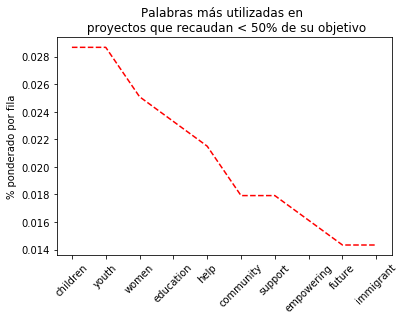

In [6]:
plt.plot(name_words_not_cero_to_graph[0], name_words_not_cero_to_graph[1], 'r--')
xTicks=name_words_not_cero_to_graph[0]
plt.title(u'Palabras más utilizadas en \n proyectos que recaudan < 50% de su objetivo')
plt.ylabel(u'% ponderado por fila')
plt.xticks(name_words_not_cero_to_graph[0], xTicks)
plt.xticks(range(10), xTicks, rotation=45) #writes strings with 45 degree angle
plt.savefig('chart_words_not_cero.png',bbox_inches='tight',dpi=150)

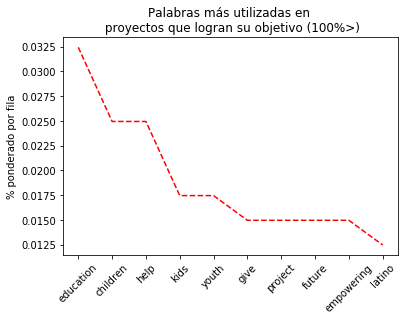

In [7]:
plt.plot(name_words_goal_to_graph[0], name_words_goal_to_graph[1], 'r--')
xTicks=name_words_goal_to_graph[0]
plt.title(u'Palabras más utilizadas en \n proyectos que logran su objetivo (100%>)')
plt.ylabel(u'% ponderado por fila')
plt.xticks(name_words_goal_to_graph[0], xTicks)
plt.xticks(range(10), xTicks, rotation=45) #writes strings with 45 degree angle
plt.savefig('chart_words_goal.png',bbox_inches='tight',dpi=150)

In [8]:
def all_chart(s_1,s_2,s_3):
    elements1=len(s_1)
    elements2=len(s_2)
    elements3=len(s_3)
    s1=s_1[0:15]
    s2=s_2[0:15]
    s3=s_3[0:15]
    x=[]
    y_1=[]
    y_2=[]
    y_3=[]
    for s_1 in s1:
        x.append(s_1[0])
    for s_2 in s2:
        x.append(s_2[0])
    for s_3 in s3:
        x.append(s_3[0])
    x=list(set(x))
    x.sort()
    
    s1_dict=dict(s1[0:15])
    s2_dict=dict(s2[0:15])
    s3_dict=dict(s3[0:15])
    
    s1_keys=s1_dict.keys()
    s2_keys=s2_dict.keys()
    s3_keys=s3_dict.keys()
    
    for word in x:        
        if word in s1_keys:            
            y_1.append(float(s1_dict[word])/float(elements1))            
        else:
            y_1.append(0)            
        if word in s2_keys:            
            y_2.append((float(s2_dict[word])/float(elements2)))            
        else:
            y_2.append(0)            
        if word in s3_keys:            
            y_3.append((float(s3_dict[word])/float(elements3)))            
        else:
            y_3.append(0)        
    return (x,y_1,y_2,y_3)

In [9]:
bag_of_words=all_chart(name_words_cero.values.tolist(),name_words_not_cero.values.tolist(),name_words_goal.values.tolist())

In [10]:
len(bag_of_words[0])

27

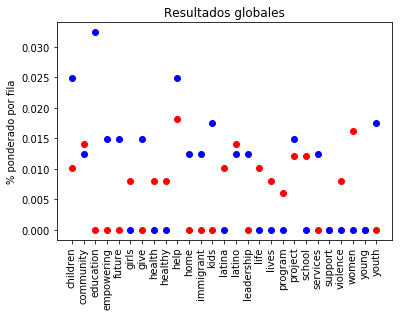

In [11]:
x=bag_of_words[0]
#plt.plot(bag_of_words[0],bag_of_words[1],'r--',bag_of_words[2],'b--',bag_of_words[3],'g--')
plt.plot(bag_of_words[0],bag_of_words[1],'ro',bag_of_words[3],'bo')
#plt.plot(name_words_goal_to_graph[0], name_words_goal_to_graph[1], 'r--')
xTicks=x
#xTicks=name_words_goal_to_graph[0]
plt.title(u'Resultados globales')
plt.ylabel(u'% ponderado por fila')
plt.xticks(x, xTicks)
#plt.xticks(name_words_goal_to_graph[0], xTicks)
plt.xticks(range(27), xTicks, rotation=90) #writes strings with 45 degree angle
plt.savefig('chart_words_total.png',bbox_inches='tight',dpi=150)

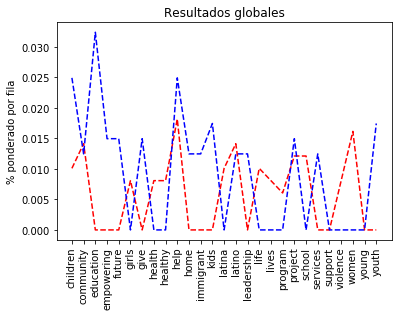

In [12]:
x=bag_of_words[0]
plt.plot(bag_of_words[0],bag_of_words[1],'r--',bag_of_words[3],'b--')
xTicks=x
plt.title(u'Resultados globales')
plt.ylabel(u'% ponderado por fila')
plt.xticks(x, xTicks)
plt.xticks(range(27), xTicks, rotation=90) #writes strings with 45 degree angle
plt.savefig('chart_words_total1.png',bbox_inches='tight',dpi=150)

## Gráficas de las palabras más empleadas en la short description

In [13]:
bag_of_words=all_chart(short_description_words_cero.values.tolist(),short_description_words_not_cero.values.tolist(),short_description_words_goal.values.tolist())

In [14]:
len(bag_of_words[0])

22

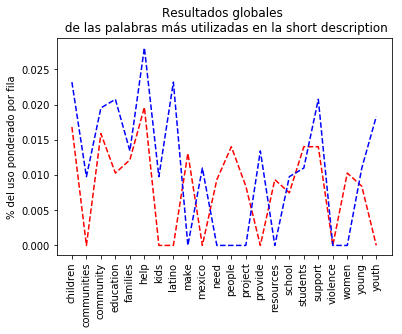

In [16]:
x=bag_of_words[0]
plt.plot(bag_of_words[0],bag_of_words[1],'r--',bag_of_words[3],'b--')
xTicks=x
plt.title(u'Resultados globales \n de las palabras más utilizadas en la short description')
plt.ylabel(u'% del uso ponderado por fila')
plt.xticks(x, xTicks)
plt.xticks(range(len(bag_of_words[0])), xTicks, rotation=90) #writes strings with 45 degree angle
plt.savefig('chart_words_total_english_short_des.png',bbox_inches='tight',dpi=150)

## Gráficas de las palabras más empleadas en la long description

In [18]:
bag_of_words=all_chart(long_description_words_cero.values.tolist(),long_description_words_not_cero.values.tolist(),long_description_words_goal.values.tolist())

In [19]:
len(bag_of_words[0])

21

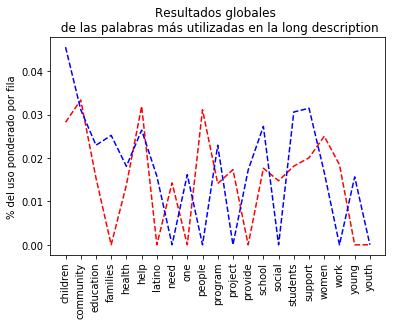

In [20]:
x=bag_of_words[0]
plt.plot(bag_of_words[0],bag_of_words[1],'r--',bag_of_words[3],'b--')
xTicks=x
plt.title(u'Resultados globales \n de las palabras más utilizadas en la long description')
plt.ylabel(u'% del uso ponderado por fila')
plt.xticks(x, xTicks)
plt.xticks(range(len(bag_of_words[0])), xTicks, rotation=90) #writes strings with 45 degree angle
plt.savefig('chart_words_total_english_long_des.png',bbox_inches='tight',dpi=150)